# Comparison of GALAH DR3 with APOGEE DR16 / OCCAM survey for cluster members according to Cantat-Gaudin+2020

## Author(s): Sven Buder (SB, WG4)


### History:
200329 SB Created

In [292]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import scipy
import pandas as pd
from astropy.table import Table, hstack, vstack, join
from itertools import combinations, product
from tqdm.notebook import tqdm

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [293]:
dr3 = Table.read('../../../catalogs/GALAH_DR3_main.fits')

# Select important identifiers from Cantat-Gaudin+2020

In [294]:
# Lorenzo has provided a match of DR3 sobject_ids with those from Cantat-Gaudin
cantat_gaudin = Table.read('CantatGaudin2020_GALAHDR3_simplified.fits')

In [295]:
# Put members of each cluster into dictionary
#dr3_cluster = dict()
dr3_cluster['NAME'] = np.unique(cantat_gaudin['Cluster'])

members = []
short_name = []
for each_cluster in dr3_cluster['NAME']:
    members.append(cantat_gaudin['sobject_id'][(cantat_gaudin['Cluster']==each_cluster)])
    short_name.append(each_cluster.replace(' ',''))
dr3_cluster['members'] = np.array(members)
dr3_cluster['short_name'] = np.array(short_name)

In [296]:
# Match the members with the DR3 main file
is_in_dr3_all = []
for members, cluster in zip(dr3_cluster['members'],dr3_cluster['NAME']):
    is_in_dr3 = []
    for each_member in members:
        dr3_index = np.where(each_member == dr3['sobject_id'])[0]
        if len(dr3_index) == 1:
            is_in_dr3.append(dr3_index[0])
        else:
            print('problem for '+each_member)
    is_in_dr3_all.append(is_in_dr3)
dr3_cluster['oid'] = np.array(is_in_dr3_all)

# Select important identifiers from OCCAM

In [297]:
occam_cluster = Table.read('occam_cluster-DR16.fits')
occam_all = Table.read('occam_member-DR16.fits')
dr16 = Table.read('../../../../Surveys/APOGEE_DR16.fits')
dr16_occam = join(occam_all, dr16, keys='APOGEE_ID')

In [298]:
in_occam = ['ASCC_16','ASCC_21','Berkeley_33','Melotte_22','NGC_2204', 'NGC_2232',
            'NGC_2243','NGC_2318',  'NGC_2682', 'Ruprecht_147']
not_in_occam = ['ASCC_41', 'ASCC_99', 'Alessi_24','Alessi_44', 'Alessi_5', 'Alessi_9',
                'Alessi_Teutsch_12', 'BH_99','Berkeley_32','Berkeley_73', 'Berkeley_78',
                'Blanco_1','Collinder_135', 'Collinder_359', 'Dias_2','Gulliver_13', 
                'IC_2602', 'IC_4665', 'Mamajek_4', 'Melotte_101', 'NGC_1647', 'NGC_1750',
                'NGC_1817', 'NGC_1901','NGC_2112', 'NGC_2186',  'NGC_2215','NGC_2516', 
                'NGC_2548', 'NGC_2632', 'NGC_3293', 'NGC_3680', 'NGC_5460', 'NGC_6253',
                'NGC_6469', 'NGC_6475', 'NGC_6568', 'NGC_6583', 'NGC_6716','Patchick_90',
                'Ruprecht_145', 'Ruprecht_8',
                'Trumpler_20', 'Trumpler_26', 'Turner_5', 'UBC_7', 'UPK_12',
                'UPK_13', 'UPK_40', 'UPK_418', 'UPK_422', 'UPK_467', 'UPK_524',
                'UPK_526', 'UPK_540', 'UPK_545', 'UPK_552', 'UPK_560', 'UPK_579',
                'UPK_585', 'UPK_587', 'UPK_599', 'UPK_606', 'UPK_612', 'UPK_624'
               ]
print('In OCCAM:')
for each in in_occam:
    occam_in_dr3 = np.where(dr3_cluster['short_name']==each)[0][0]
    print(each+' ('+str(len(dr3_cluster['members'][occam_in_dr3]))+'),')

In OCCAM:
ASCC_16 (22),
ASCC_21 (11),
Berkeley_33 (8),
Melotte_22 (74),
NGC_2204 (81),
NGC_2232 (20),
NGC_2243 (8),
NGC_2318 (2),
NGC_2682 (278),
Ruprecht_147 (80),


# Analysis of the 8 largest clusters with 50+ observed members

In [304]:
def analyse_cluster(cluster_short_name, flag_sp_cut = 0):
    oid_in_dict = np.where(cluster_short_name == dr3_cluster['short_name'])[0][0]

    overplot_occam = False
    if cluster in in_occam:
        overplot_occam = True
        
        occam_oid = np.where(occam_cluster['NAME'] == cluster_short_name)[0][0]
        occam_dr16_oid = np.where(dr16_occam['CLUSTER'] == cluster_short_name.replace('_',' '))[0]
        occam_0 = (
            (dr16_occam['ASPCAPFLAG'][occam_dr16_oid] == 0) & 
            (dr16_occam['FE_H_FLAG'][occam_dr16_oid] == 0) & 
            (dr16_occam['FE_H_1'][occam_dr16_oid] > - 100) &
            (dr16_occam['LOGG'][occam_dr16_oid] > - 100)
        )
        
    cluster_oid = dr3_cluster['oid'][oid_in_dict]
        
    f, gs = plt.subplots(1,3,figsize=(15,5))
    
    kwarfs_errorbar = dict(fmt='o',ms=0,lw=0.5)
    
    for ax_id, ax in enumerate(gs):
        
        flag_0 = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_not_0 = (dr3['flag_sp'][cluster_oid] > flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_0_not_hotcool = flag_0 & (dr3['teff'][cluster_oid] <6500) & (dr3['teff'][cluster_oid] >4500)
        
        if ax_id == 0:
            
            ax.set_title(cluster_short_name.replace('_',' '))

            if overplot_occam:
                ax.errorbar(
                    dr16_occam['TEFF'][occam_dr16_oid][occam_0],
                    dr16_occam['LOGG'][occam_dr16_oid][occam_0],
                    xerr = dr16_occam['TEFF_ERR'][occam_dr16_oid][occam_0],
                    yerr = dr16_occam['LOGG_ERR'][occam_dr16_oid][occam_0],
                    c='C0',label='OCCAM',zorder=1,
                    **kwarfs_errorbar
                )
            
            ax.errorbar(
                dr3['teff'][cluster_oid][flag_not_0],
                dr3['logg'][cluster_oid][flag_not_0],
                xerr = dr3['e_teff'][cluster_oid][flag_not_0],
                yerr = dr3['e_logg'][cluster_oid][flag_not_0],
                c='C3',label=r'GALAH DR3 \texttt{flag\_sp} $\neq$ 0',
                zorder=2,
                **kwarfs_errorbar
            )
            
            ax.errorbar(
                dr3['teff'][cluster_oid][flag_0],
                dr3['logg'][cluster_oid][flag_0],
                xerr = dr3['e_teff'][cluster_oid][flag_0],
                yerr = dr3['e_logg'][cluster_oid][flag_0],
                c='k',label=r'GALAH DR3 \texttt{flag\_sp}=0',
                zorder=3,
                **kwarfs_errorbar
            )
            
            ax.set_xlim(8000,3000)
            ax.set_xlabel(r'$T_\text{eff}$')
            ax.set_ylim(5.5,-0.5)
            ax.set_ylabel(r'$\log g$')
            ax.legend(fontsize=12,loc='upper left')

        if ax_id == 1:
            
            ax.set_title(cluster_short_name.replace('_',' '))

            if overplot_occam:
                ax.errorbar(
                    dr16_occam['TEFF'][occam_dr16_oid][occam_0],
                    dr16_occam['FE_H_1'][occam_dr16_oid][occam_0],
                    xerr = dr16_occam['TEFF_ERR'][occam_dr16_oid][occam_0],
                    yerr = dr16_occam['FE_H_ERR_1'][occam_dr16_oid][occam_0],
                    c='C0',label='OCCAM',zorder=1,
                    **kwarfs_errorbar
                )
                ax.axhspan(
                    occam_cluster['FE_H'][occam_oid]-occam_cluster['FE_H_ERR'][occam_oid],
                    occam_cluster['FE_H'][occam_oid]+occam_cluster['FE_H_ERR'][occam_oid],
                    facecolor='C0',alpha=0.25,
                    label='Mean'
                )
                ax.axhline(
                    occam_cluster['FE_H'][occam_oid],
                    c='C0'
                )
                props = dict(boxstyle='round', facecolor='w', edgecolor = 'None', alpha=0.95,zorder=4)
                if cluster_short_name in ['NGC_2516','Ruprecht_147','Melotte_22','Blanco_1','NGC_2548']:
                    ax.text(0.5,0.15,r'OCCAM [Fe/H]: $'+str(occam_cluster['FE_H'][occam_oid])+'\pm'+str(occam_cluster['FE_H_ERR'][occam_oid])+'$',transform=ax.transAxes,color='C0',ha='center',fontsize=15,bbox=props)
                else:
                    ax.text(0.5,0.85,r'OCCAM [Fe/H]: $'+str(occam_cluster['FE_H'][occam_oid])+'\pm'+str(occam_cluster['FE_H_ERR'][occam_oid])+'$',transform=ax.transAxes,color='C0',ha='center',fontsize=15,bbox=props)
            
            mean = np.mean(dr3['fe_h'][cluster_oid][flag_0_not_hotcool])
            std = np.std(dr3['fe_h'][cluster_oid][flag_0_not_hotcool])
            
            ax.axhspan(
                mean-std,
                mean+std,
                facecolor='grey',alpha=0.25,
                label='Mean'
            )
            ax.axhline(
                mean,
                c='k'
            )
            ax.axvline(4500,c='k',ls='dashed')
            ax.axvline(6500,c='k',ls='dashed')
            props = dict(boxstyle='round', facecolor='w', edgecolor = 'w', alpha=0.95,zorder=5)
            if cluster_short_name in ['NGC_2516','Ruprecht_147','Melotte_22','Blanco_1','NGC_2548']:
                ax.text(0.5,0.05,r'GALAH DR3 [Fe/H]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center',fontsize=15,bbox=props)
            else:
                ax.text(0.5,0.925,r'GALAH DR3 [Fe/H]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center',fontsize=15,bbox=props)
                
            ax.errorbar(
                dr3['teff'][cluster_oid][flag_not_0],
                dr3['fe_h'][cluster_oid][flag_not_0],
                xerr = dr3['e_teff'][cluster_oid][flag_not_0],
                yerr = dr3['e_fe_h'][cluster_oid][flag_not_0],
                c='C3',label=r'GALAH DR3 \texttt{flag\_sp} $\neq$ 0',
                zorder=2,
                **kwarfs_errorbar
            )
            
            ax.errorbar(
                dr3['teff'][cluster_oid][flag_0],
                dr3['fe_h'][cluster_oid][flag_0],
                xerr = dr3['e_teff'][cluster_oid][flag_0],
                yerr = dr3['e_fe_h'][cluster_oid][flag_0],
                c='k',label=r'GALAH DR3 \texttt{flag\_sp}=0',
                zorder=3,
                **kwarfs_errorbar
            )
            ax.invert_xaxis()
            ax.set_xlabel(r'$T_\text{eff}$')
            ax.set_ylabel(r'[Fe/H]')
            #ax.legend(fontsize=12)

        if ax_id == 2:
            
            ax.set_title(cluster_short_name.replace('_',' '))

            if overplot_occam:
                ax.errorbar(
                    dr16_occam['LOGG'][occam_dr16_oid][occam_0],
                    dr16_occam['FE_H_1'][occam_dr16_oid][occam_0],
                    xerr = dr16_occam['LOGG_ERR'][occam_dr16_oid][occam_0],
                    yerr = dr16_occam['FE_H_ERR_1'][occam_dr16_oid][occam_0],
                    c='C0',label='OCCAM',zorder=1,
                    **kwarfs_errorbar
                )   
                ax.axhspan(
                    occam_cluster['FE_H'][occam_oid]-occam_cluster['FE_H_ERR'][occam_oid],
                    occam_cluster['FE_H'][occam_oid]+occam_cluster['FE_H_ERR'][occam_oid],
                    facecolor='C0',alpha=0.25,
                    label='Mean'
                )
                ax.axhline(
                    occam_cluster['FE_H'][occam_oid],
                    c='C0'
                )
                props = dict(boxstyle='round', facecolor='w', edgecolor = 'w', alpha=0.95,zorder=4)
                if cluster_short_name in ['NGC_2516','Ruprecht_147','Melotte_22','Blanco_1','NGC_2548']:
                    ax.text(0.5,0.15,r'OCCAM [Fe/H]: $'+str(occam_cluster['FE_H'][occam_oid])+'\pm'+str(occam_cluster['FE_H_ERR'][occam_oid])+'$',transform=ax.transAxes,color='C0',ha='center',fontsize=15,bbox=props)
                else:
                    ax.text(0.5,0.85,r'OCCAM [Fe/H]: $'+str(occam_cluster['FE_H'][occam_oid])+'\pm'+str(occam_cluster['FE_H_ERR'][occam_oid])+'$',transform=ax.transAxes,color='C0',ha='center',fontsize=15,bbox=props)
            
            mean = np.mean(dr3['fe_h'][cluster_oid][flag_0_not_hotcool])
            std = np.std(dr3['fe_h'][cluster_oid][flag_0_not_hotcool])
            
            ax.axhspan(
                mean-std,
                mean+std,
                facecolor='grey',alpha=0.25,
                label='Mean'
            )
            ax.axhline(
                mean,
                c='k'
            )
            props = dict(boxstyle='round', facecolor='w', edgecolor = 'w', alpha=0.95,zorder=5)
            if cluster_short_name in ['NGC_2516','Ruprecht_147','Melotte_22','Blanco_1','NGC_2548']:
                ax.text(0.5,0.05,r'GALAH DR3 [Fe/H]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center',fontsize=15,bbox=props)
            else:
                ax.text(0.5,0.925,r'GALAH DR3 [Fe/H]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center',fontsize=15,bbox=props)
                
            ax.errorbar(
                dr3['logg'][cluster_oid][flag_not_0],
                dr3['fe_h'][cluster_oid][flag_not_0],
                xerr = dr3['e_logg'][cluster_oid][flag_not_0],
                yerr = dr3['e_fe_h'][cluster_oid][flag_not_0],
                c='C3',label=r'GALAH DR3 \texttt{flag\_sp} $\neq$ 0',
                zorder=2,
                **kwarfs_errorbar
            )
            ax.errorbar(
                dr3['logg'][cluster_oid][flag_0],
                dr3['fe_h'][cluster_oid][flag_0],
                xerr = dr3['e_logg'][cluster_oid][flag_0],
                yerr = dr3['e_fe_h'][cluster_oid][flag_0],
                c='k',label=r'GALAH DR3 \texttt{flag\_sp}=0',
                zorder=3,
                **kwarfs_errorbar
            )
            ax.invert_xaxis()
            ax.set_xlabel(r'$\log g$')
            ax.set_ylabel(r'[Fe/H]')
            #ax.legend(fontsize=12)
    plt.tight_layout(w_pad=0,h_pad=0)
    
    print(r'\includegraphics[width=0.49\textwidth]{figures/oc_'+cluster_short_name+'.png}')
    plt.savefig('../../../dr3_release_paper/figures/oc_'+cluster_short_name+'.png',dpi=200,bbox_inches='tight')

NB: Mean [Fe/H] only based on stars with 4500 < Teff < 6500 (indicated by dashed line)
\includegraphics[width=0.49\textwidth]{figures/oc_NGC_2682.png}
\includegraphics[width=0.49\textwidth]{figures/oc_NGC_2632.png}
\includegraphics[width=0.49\textwidth]{figures/oc_NGC_2516.png}
\includegraphics[width=0.49\textwidth]{figures/oc_NGC_2204.png}
\includegraphics[width=0.49\textwidth]{figures/oc_Ruprecht_147.png}
\includegraphics[width=0.49\textwidth]{figures/oc_Melotte_22.png}
\includegraphics[width=0.49\textwidth]{figures/oc_Blanco_1.png}
\includegraphics[width=0.49\textwidth]{figures/oc_NGC_2548.png}


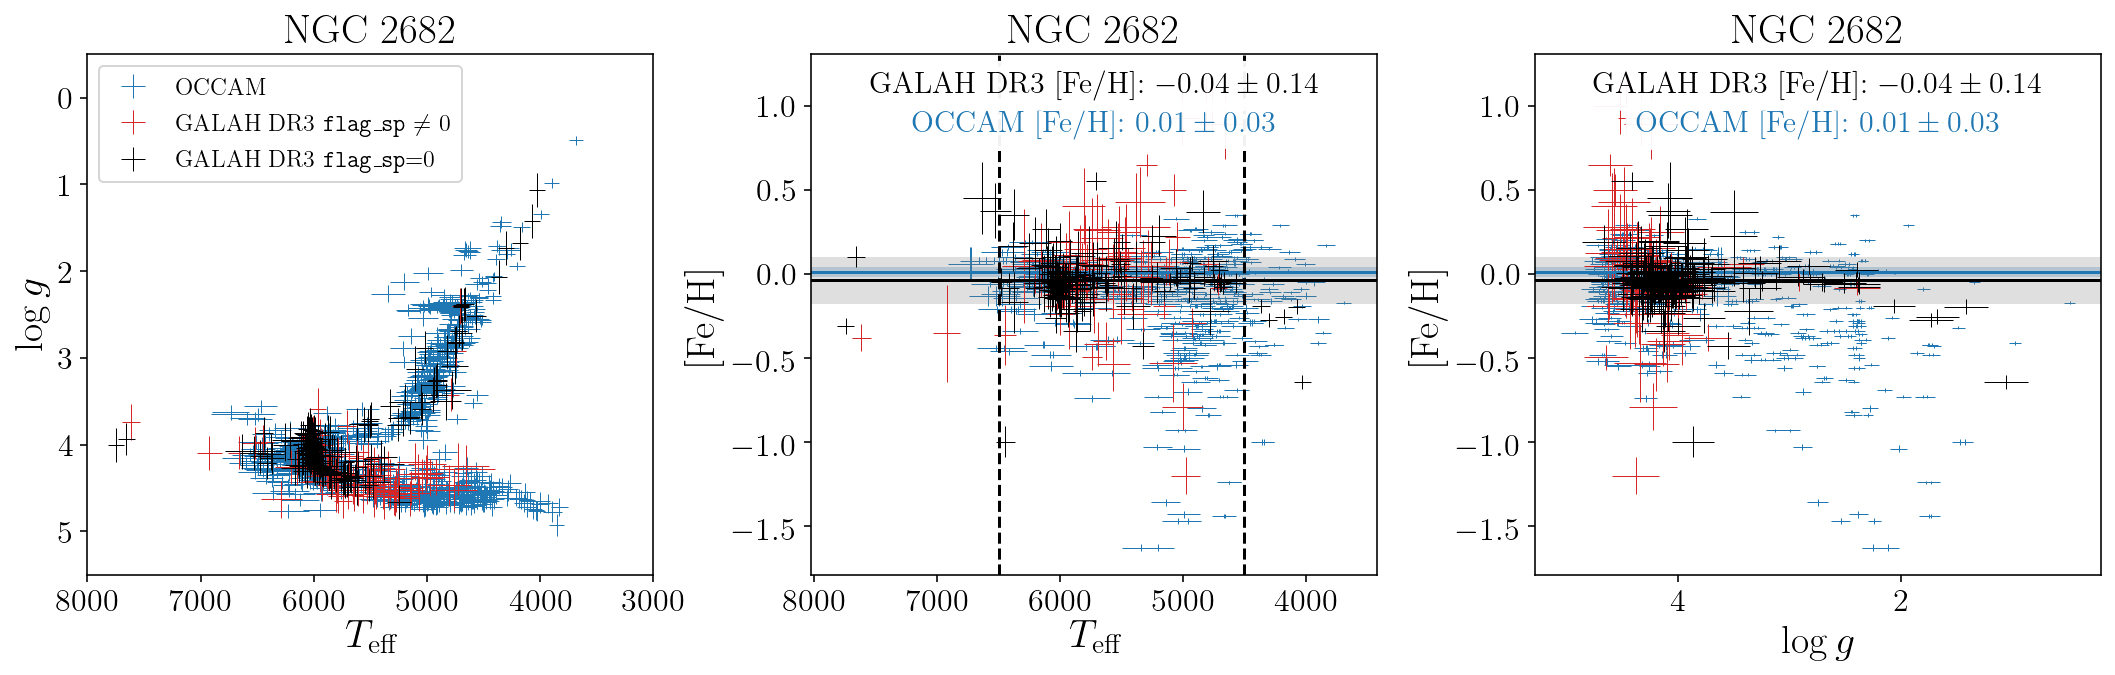

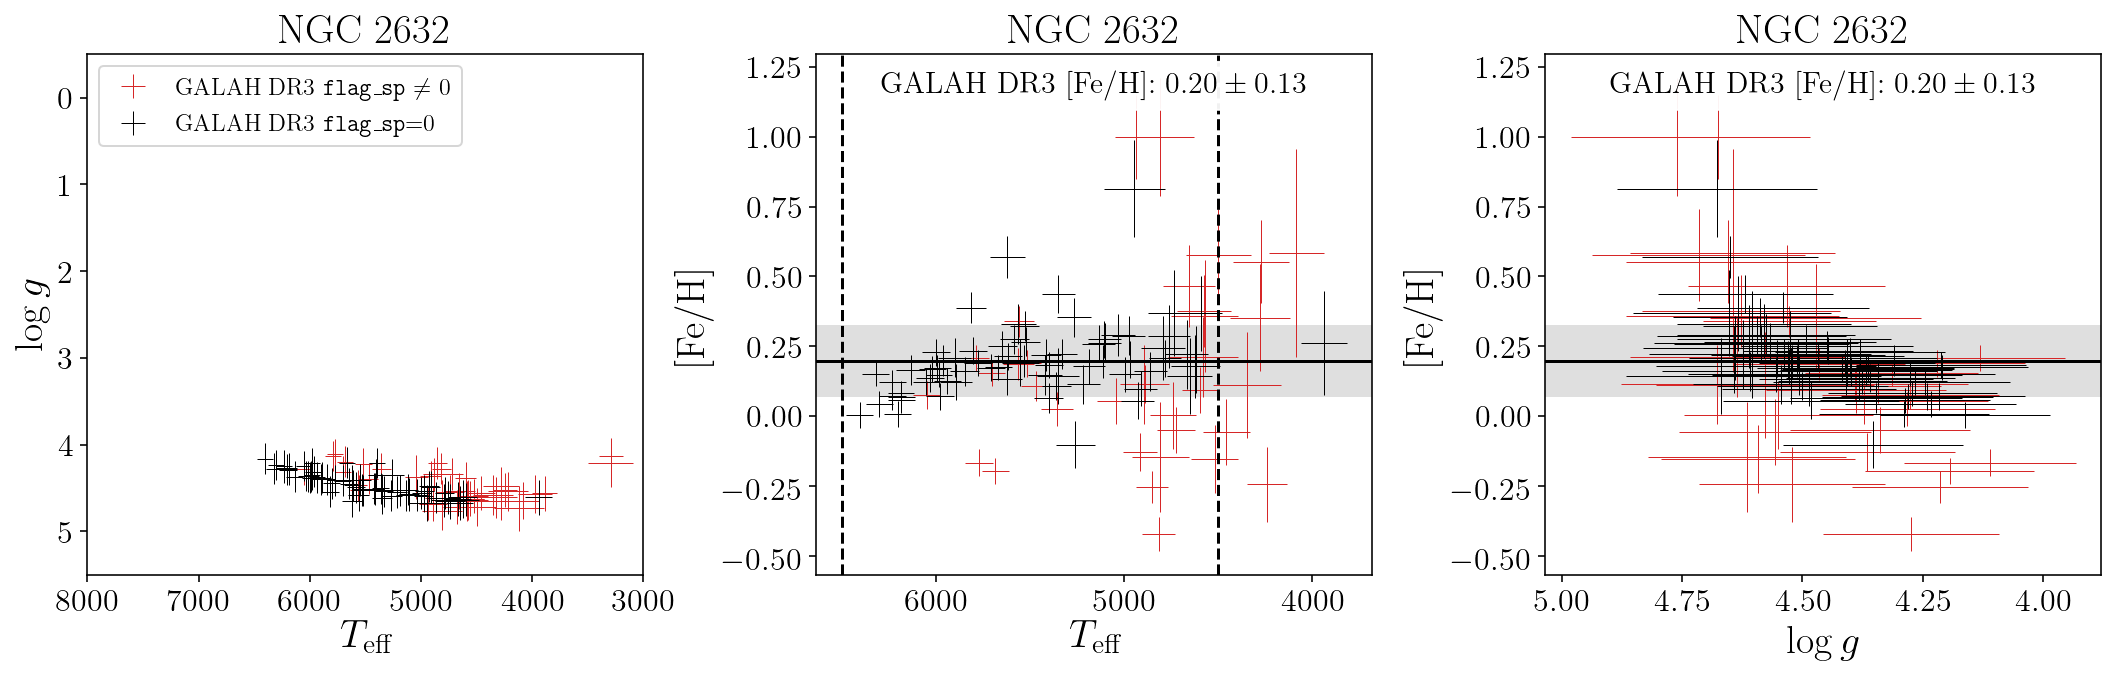

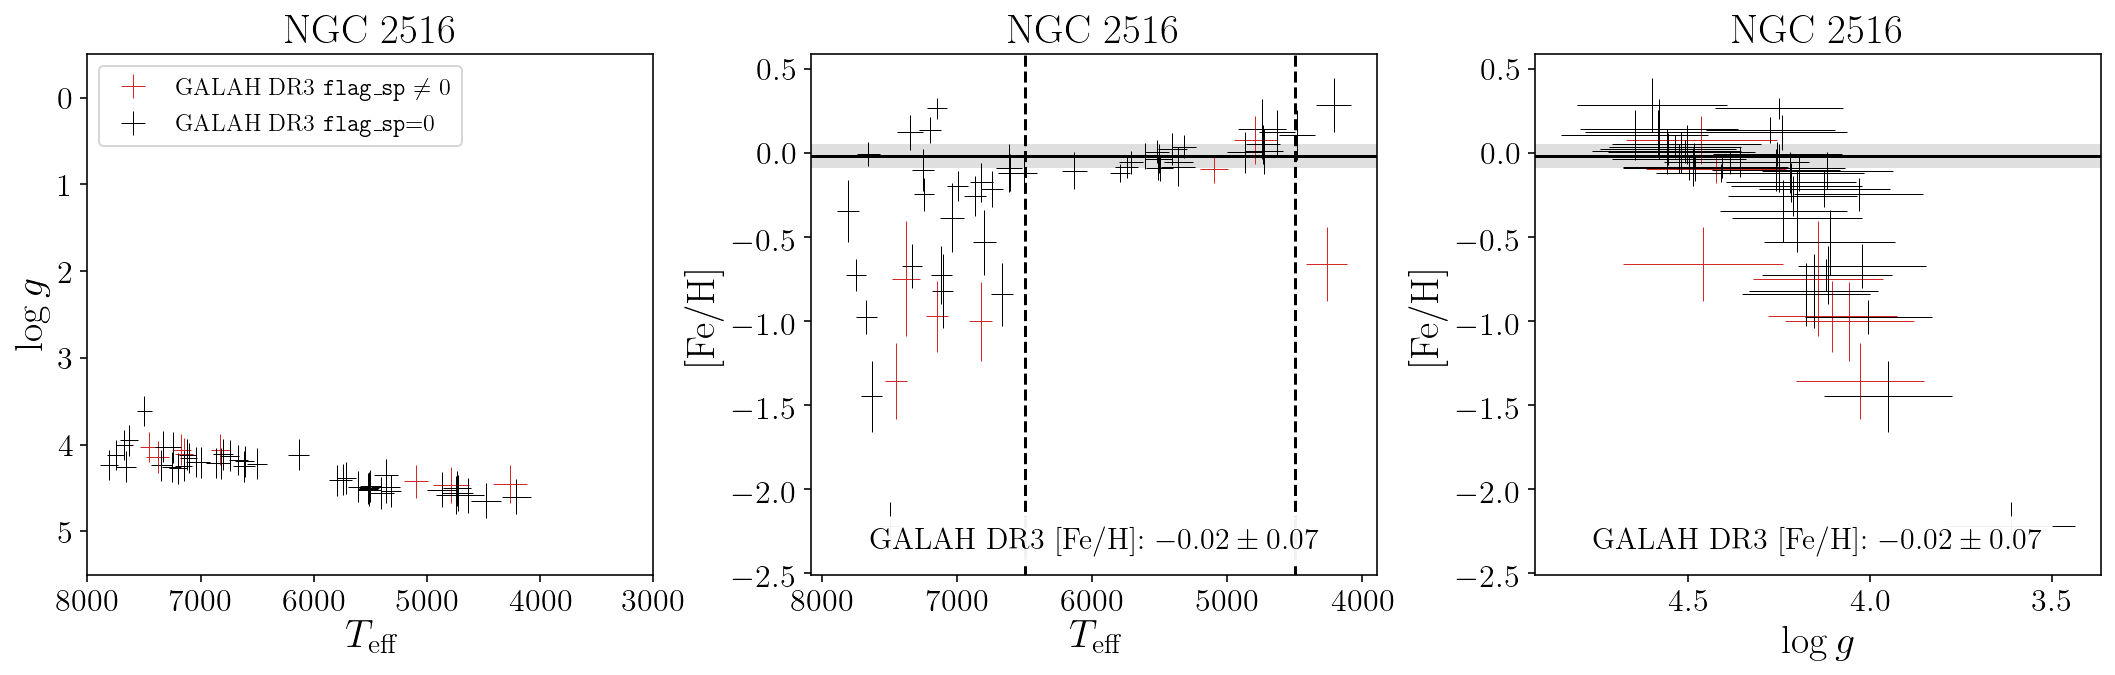

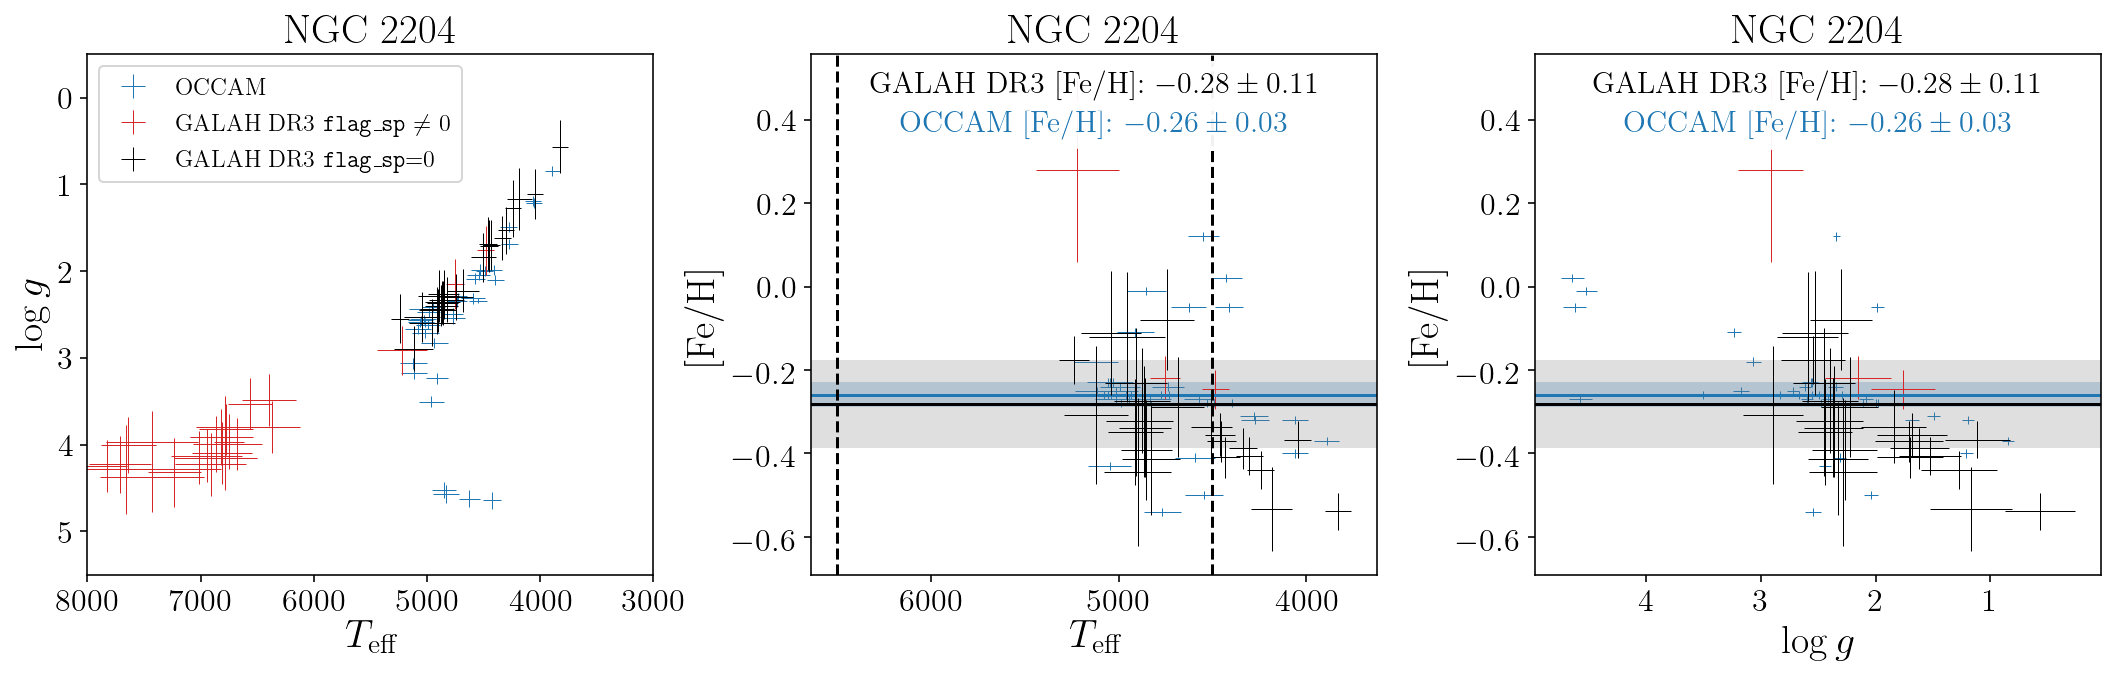

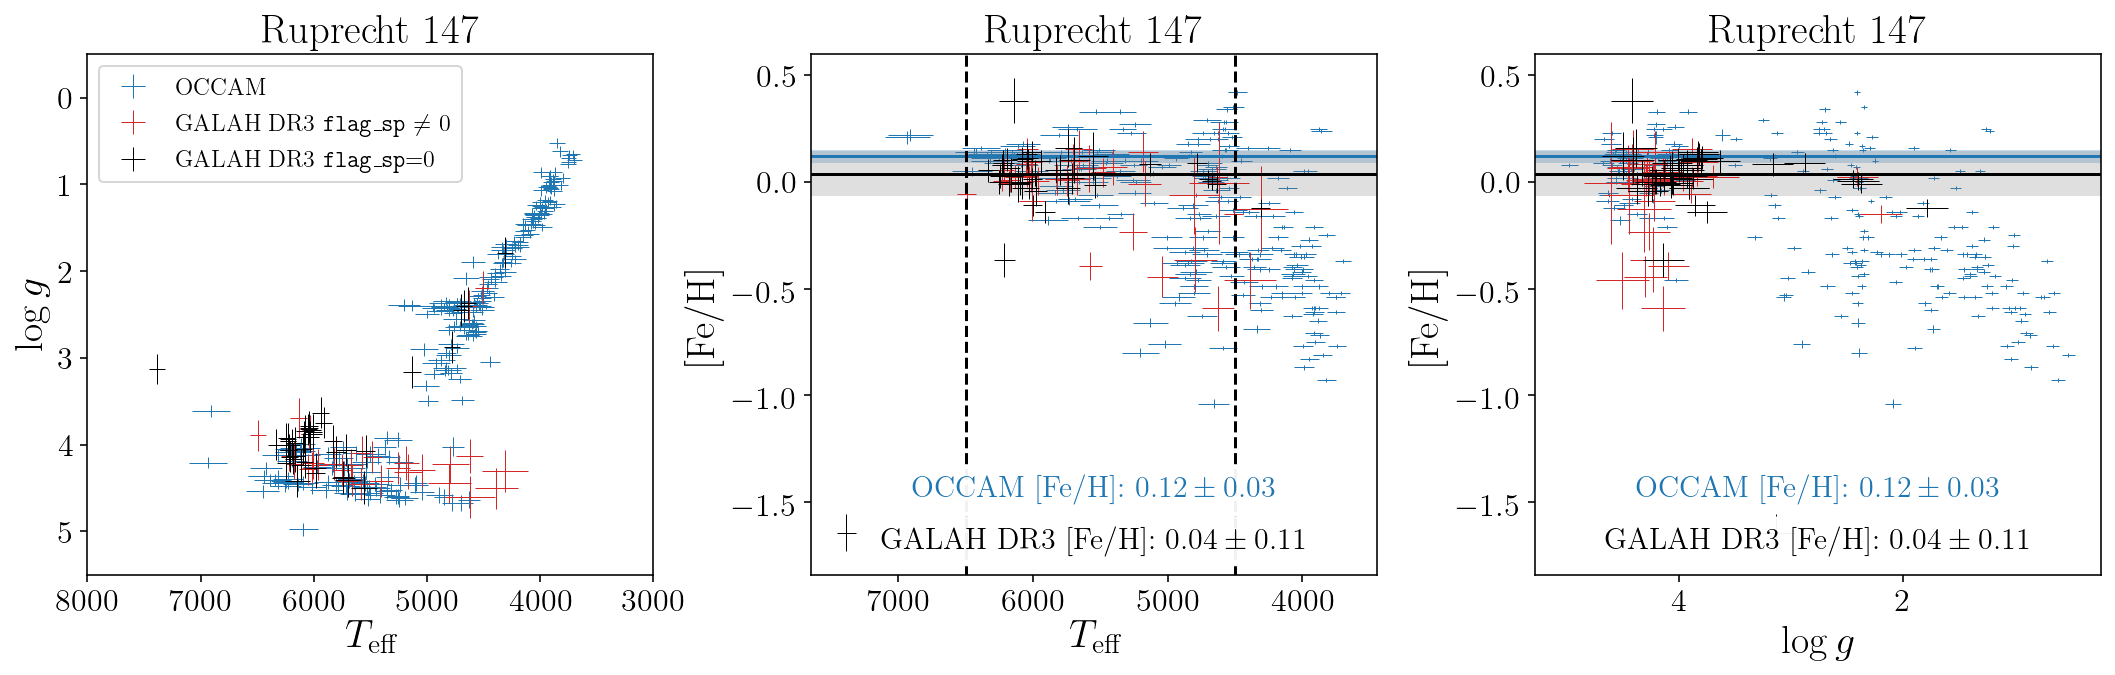

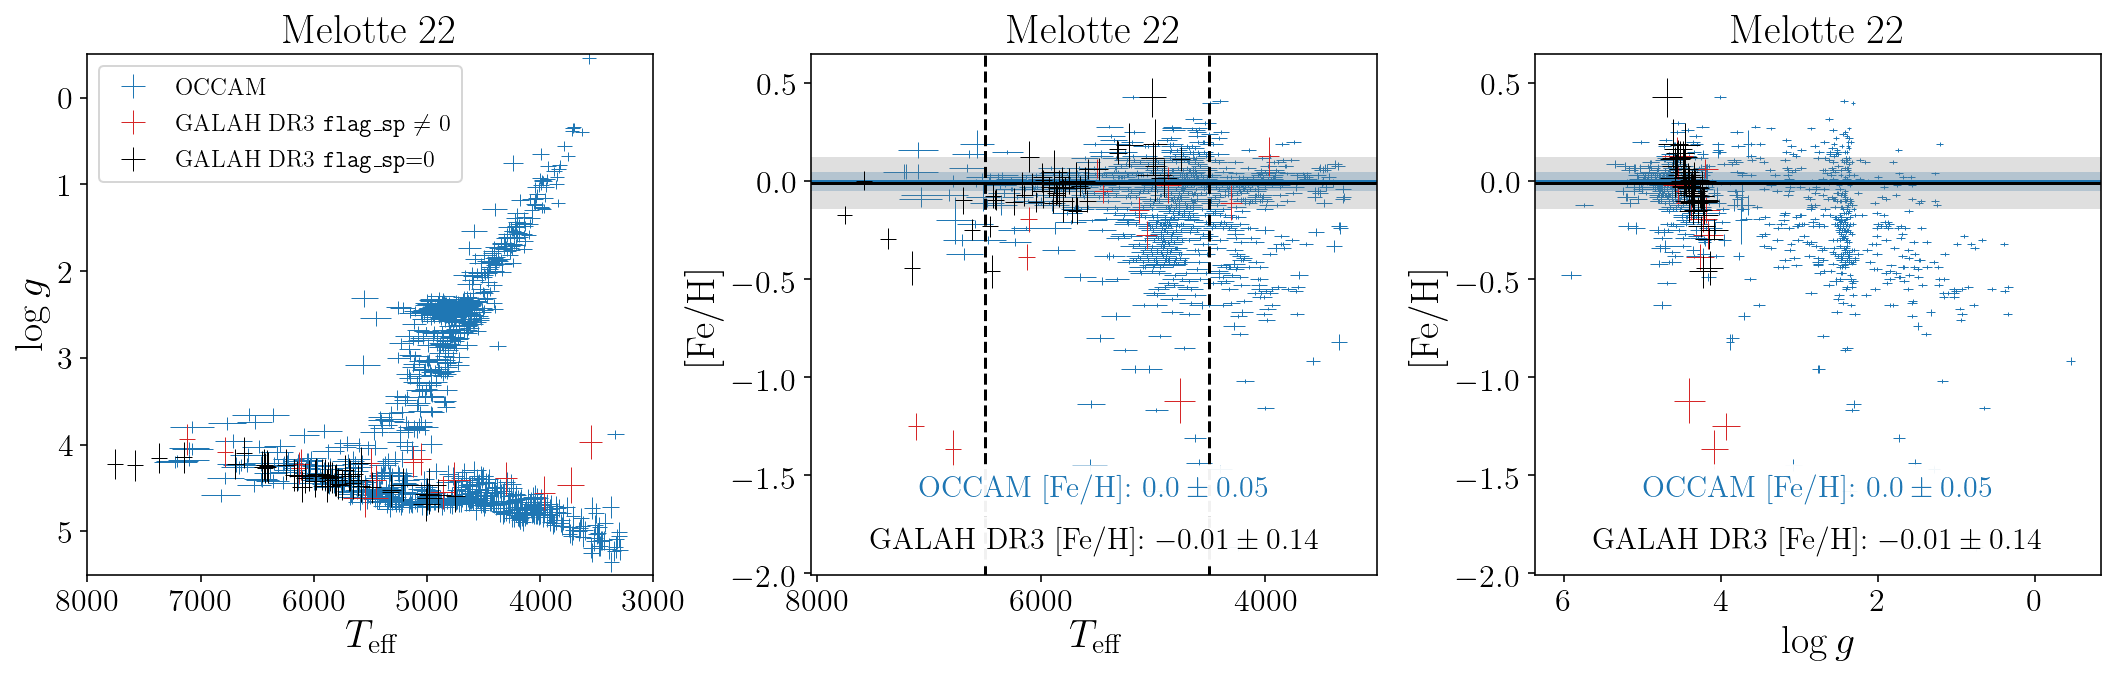

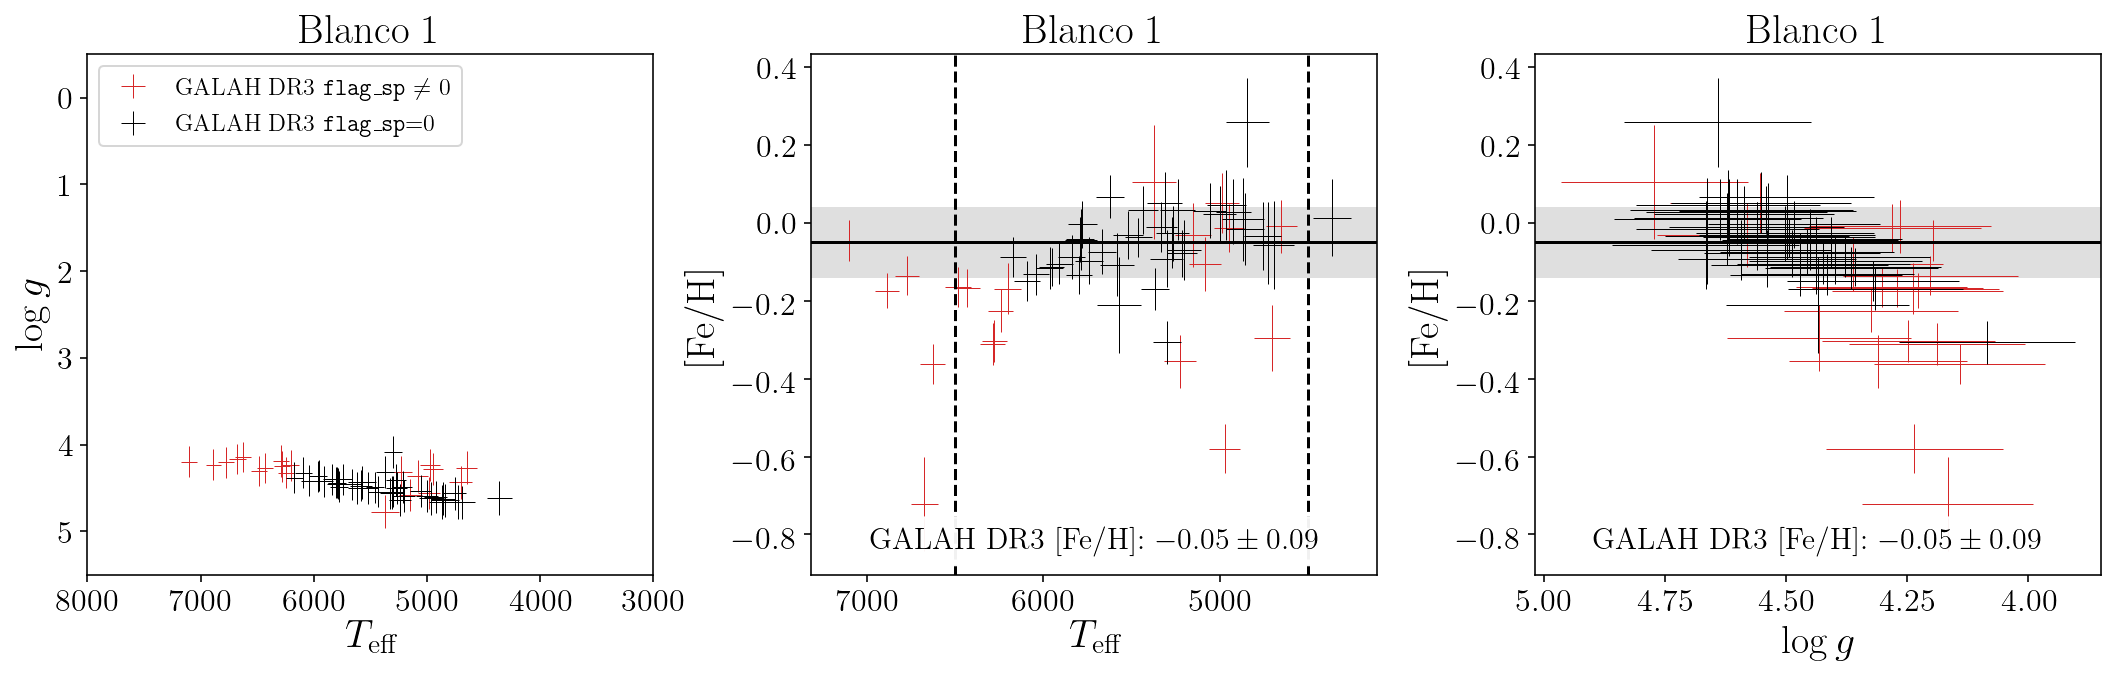

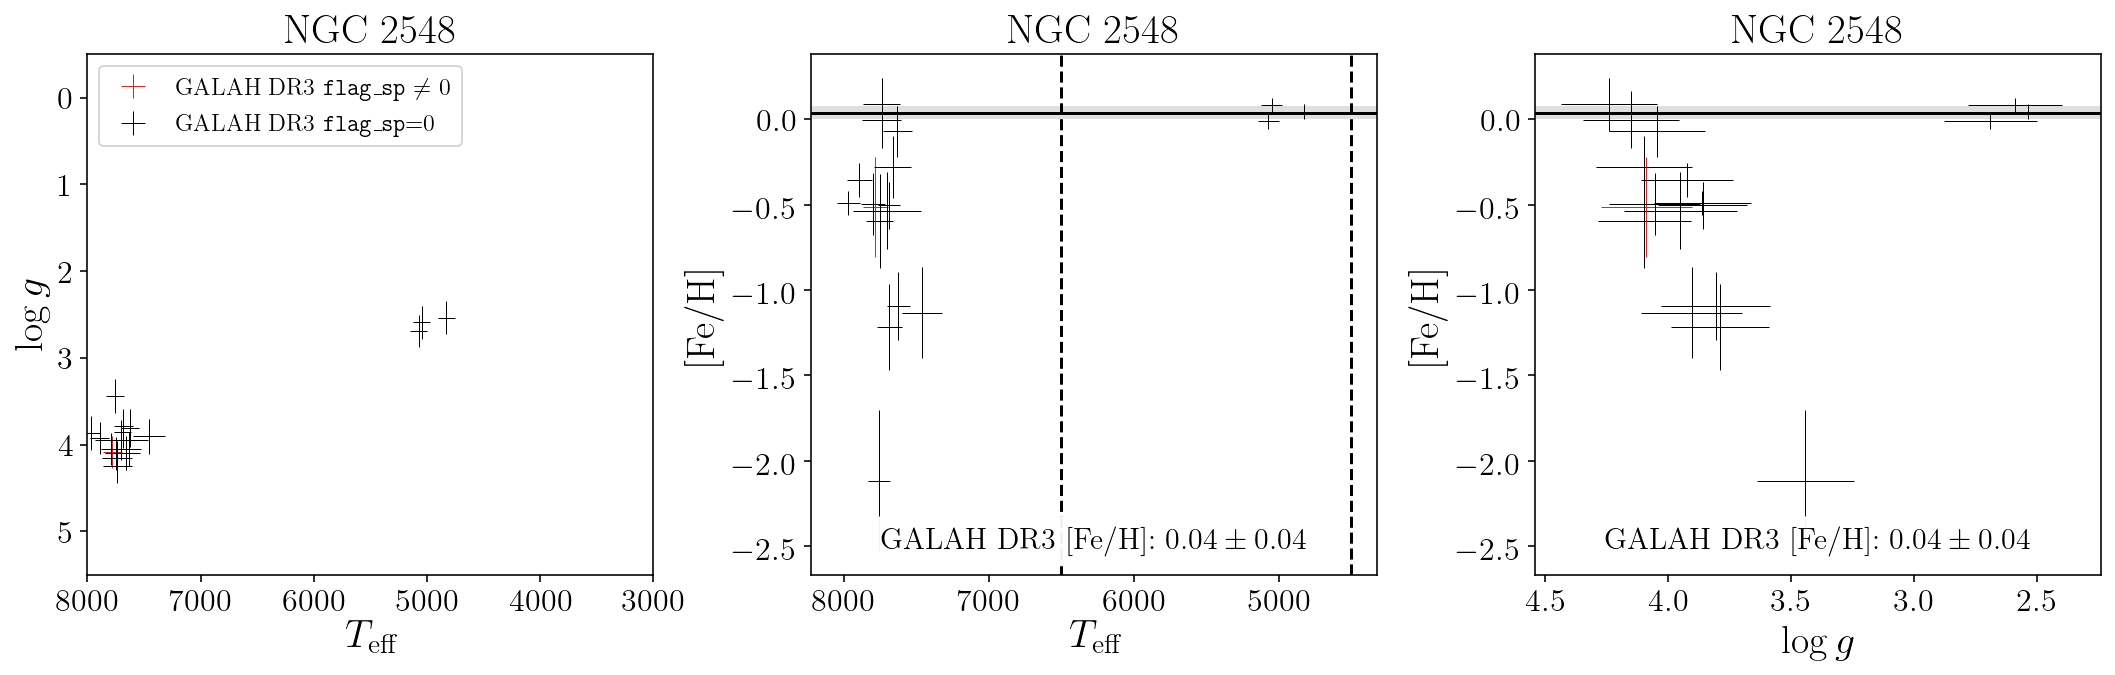

In [305]:
print("NB: Mean [Fe/H] only based on stars with 4500 < Teff < 6500 (indicated by dashed line)")

for cluster in ['NGC_2682','NGC_2632','NGC_2516','NGC_2204','Ruprecht_147','Melotte_22','Blanco_1','NGC_2548']:

    analyse_cluster(cluster_short_name = cluster)

In [398]:
def analyse_cluster_ab(cluster_short_name, elem = 'O', flag_sp_cut = 0, flag_ab_cut = 0):

    oid_in_dict = np.where(cluster_short_name == dr3_cluster['short_name'])[0][0]

    overplot_occam = False
    if ((cluster in in_occam) & (elem in ['C','O','Na','Mg','Al','Si','K','Ca','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Ce'])):
        overplot_occam = True
        
        occam_oid = np.where(occam_cluster['NAME'] == cluster_short_name)[0][0]
        occam_dr16_oid = np.where(dr16_occam['CLUSTER'] == cluster_short_name.replace('_',' '))[0]
        occam_0 = (
            (dr16_occam['ASPCAPFLAG'][occam_dr16_oid] == 0) & 
            (dr16_occam['FE_H_FLAG'][occam_dr16_oid] == 0) & 
            (dr16_occam['FE_H_2'][occam_dr16_oid] > - 100) &
            (dr16_occam[elem.upper()+'_FE_FLAG'][occam_dr16_oid] == 0) &
            (dr16_occam[elem.upper()+'_FE'][occam_dr16_oid] > -100) &
            (dr16_occam['LOGG'][occam_dr16_oid] > - 100)
        )
        
        if len(dr16_occam[elem.upper()+'_FE'][occam_dr16_oid]) <= 1:
            overplot_occam = False
        
    cluster_oid = dr3_cluster['oid'][oid_in_dict]
        
    f, gs = plt.subplots(1,3,figsize=(15,5),sharey=True)
    
    kwarfs_errorbar = dict(fmt='o',ms=0,lw=0.5)
    
    for ax_id, ax in enumerate(gs):
        
        flag_0 = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1) & (dr3['flag_'+elem+'_fe'][cluster_oid] <= flag_ab_cut) & np.isfinite(dr3[elem+'_fe'][cluster_oid])
        flag_not_0 = (dr3['flag_sp'][cluster_oid] > flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1) & (dr3['flag_'+elem+'_fe'][cluster_oid] > flag_ab_cut) & np.isfinite(dr3[elem+'_fe'][cluster_oid])
        flag_0_not_hotcool = flag_0 & (dr3['teff'][cluster_oid] <6500) & (dr3['teff'][cluster_oid] >4500)
        
        if ax_id == 0:

            ax.set_title(cluster_short_name.replace('_',' ')+' '+elem)

            if overplot_occam:
                ax.errorbar(
                    dr16_occam['FE_H_2'][occam_dr16_oid][occam_0],
                    dr16_occam[elem.upper()+'_FE'][occam_dr16_oid][occam_0],
                    xerr = dr16_occam['FE_H_ERR_2'][occam_dr16_oid][occam_0],
                    yerr = dr16_occam[elem.upper()+'_FE_ERR'][occam_dr16_oid][occam_0],
                    c='C0',label='OCCAM',zorder=1,
                    **kwarfs_errorbar
                )
                ax.axhspan(
                    occam_cluster[elem.upper()+'_FE'][occam_oid]-occam_cluster[elem.upper()+'_FE_ERR'][occam_oid],
                    occam_cluster[elem.upper()+'_FE'][occam_oid]+occam_cluster[elem.upper()+'_FE_ERR'][occam_oid],
                    facecolor='C0',alpha=0.25,
                )
                ax.axhline(
                    occam_cluster[elem.upper()+'_FE'][occam_oid],
                    c='C0'
                )
                
            mean = np.nanmean(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])
            std = np.nanstd(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])
            
            if np.isfinite(mean):

                ax.axhspan(
                    mean-std,
                    mean+std,
                    facecolor='grey',alpha=0.25
                )
                ax.axhline(
                    mean,
                    c='k'
                )

                ax.errorbar(
                    dr3['fe_h'][cluster_oid][flag_not_0],
                    dr3[elem+'_fe'][cluster_oid][flag_not_0],
                    xerr = dr3['e_fe_h'][cluster_oid][flag_not_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_not_0],
                    c='C3',label=r'GALAH DR3 \texttt{flag\_sp} $\neq$ 0',
                    zorder=2,
                    **kwarfs_errorbar
                )

                ax.errorbar(
                    dr3['fe_h'][cluster_oid][flag_0],
                    dr3[elem+'_fe'][cluster_oid][flag_0],
                    xerr = dr3['e_fe_h'][cluster_oid][flag_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_0],
                    c='k',label=r'GALAH DR3 \texttt{flag\_sp}=0',
                    zorder=3,
                    **kwarfs_errorbar
                )
            ax.invert_xaxis()
            ax.set_xlabel(r'[Fe/H]')
            ax.set_ylabel(r'['+elem+'/Fe]')
            if np.isfinite(mean):
                ax.legend(fontsize=12)
        
        if ax_id == 1:

            ax.set_title(cluster_short_name.replace('_',' ')+' '+elem)

            if overplot_occam:
                ax.errorbar(
                    dr16_occam['TEFF'][occam_dr16_oid][occam_0],
                    dr16_occam[elem.upper()+'_FE'][occam_dr16_oid][occam_0],
                    xerr = dr16_occam['TEFF_ERR'][occam_dr16_oid][occam_0],
                    yerr = dr16_occam[elem.upper()+'_FE_ERR'][occam_dr16_oid][occam_0],
                    c='C0',zorder=1,
                    **kwarfs_errorbar
                )
                if np.isfinite(occam_cluster[elem.upper()+'_FE'][occam_oid]):
                    oc_label = r'OCCAM ['+elem+'/Fe]: $'+str(occam_cluster[elem.upper()+'_FE'][occam_oid])+'\pm'+str(occam_cluster[elem.upper()+'_FE_ERR'][occam_oid])+'$'
                else:
                    oc_label = r'OCCAM ['+elem+'/Fe]: -'
                ax.axhspan(
                    occam_cluster[elem.upper()+'_FE'][occam_oid]-occam_cluster[elem.upper()+'_FE_ERR'][occam_oid],
                    occam_cluster[elem.upper()+'_FE'][occam_oid]+occam_cluster[elem.upper()+'_FE_ERR'][occam_oid],
                    facecolor='C0',alpha=0.25,label = oc_label
                )
                ax.axhline(
                    occam_cluster[elem.upper()+'_FE'][occam_oid],
                    c='C0'
                )

            mean = np.mean(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])
            std = np.std(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])

            if np.isfinite(mean):
                ax.axhspan(
                    mean-std,
                    mean+std,
                    facecolor='grey',alpha=0.25,
                    label=r'GALAH DR3 ['+elem+'/Fe]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$'
                )
                ax.axhline(
                    mean,
                    c='k'
                )

                ax.errorbar(
                    dr3['teff'][cluster_oid][flag_not_0],
                    dr3[elem+'_fe'][cluster_oid][flag_not_0],
                    xerr = dr3['e_teff'][cluster_oid][flag_not_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_not_0],
                    c='C3',
                    zorder=2,
                    **kwarfs_errorbar
                )

                ax.errorbar(
                    dr3['teff'][cluster_oid][flag_0],
                    dr3[elem+'_fe'][cluster_oid][flag_0],
                    xerr = dr3['e_teff'][cluster_oid][flag_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_0],
                    c='k',
                    zorder=3,
                    **kwarfs_errorbar
                )
            ax.axvline(4500,c='k',ls='dashed')
            ax.axvline(6500,c='k',ls='dashed')
            ax.invert_xaxis()
            ax.set_xlabel(r'$T_\text{eff}$')
            ax.set_ylabel(r'['+elem+'/Fe]')
            if np.isfinite(mean):
                ax.legend(fontsize=12)

        if ax_id == 2:

            ax.set_title(cluster_short_name.replace('_',' ')+' '+elem)

            if overplot_occam:
                ax.errorbar(
                    dr16_occam['LOGG'][occam_dr16_oid][occam_0],
                    dr16_occam[elem.upper()+'_FE'][occam_dr16_oid][occam_0],
                    xerr = dr16_occam['LOGG_ERR'][occam_dr16_oid][occam_0],
                    yerr = dr16_occam[elem.upper()+'_FE_ERR'][occam_dr16_oid][occam_0],
                    c='C0',zorder=1,
                    **kwarfs_errorbar
                )
                if np.isfinite(occam_cluster[elem.upper()+'_FE'][occam_oid]):
                    oc_label = r'OCCAM ['+elem+'/Fe]: $'+str(occam_cluster[elem.upper()+'_FE'][occam_oid])+'\pm'+str(occam_cluster[elem.upper()+'_FE_ERR'][occam_oid])+'$'
                else:
                    oc_label = r'OCCAM ['+elem+'/Fe]: -'
                ax.axhspan(
                    occam_cluster[elem.upper()+'_FE'][occam_oid]-occam_cluster[elem.upper()+'_FE_ERR'][occam_oid],
                    occam_cluster[elem.upper()+'_FE'][occam_oid]+occam_cluster[elem.upper()+'_FE_ERR'][occam_oid],
                    facecolor='C0',alpha=0.25,label=oc_label
                )
                ax.axhline(
                    occam_cluster[elem.upper()+'_FE'][occam_oid],
                    c='C0'
                )

            mean = np.mean(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])
            std = np.std(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])

            if np.isfinite(mean):
                ax.axhspan(
                    mean-std,
                    mean+std,
                    facecolor='grey',alpha=0.25,
                    label=r'GALAH DR3 ['+elem+'/Fe]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$'
                )
                ax.axhline(
                    mean,
                    c='k'
                )
                ax.errorbar(
                    dr3['logg'][cluster_oid][flag_not_0],
                    dr3[elem+'_fe'][cluster_oid][flag_not_0],
                    xerr = dr3['e_logg'][cluster_oid][flag_not_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_not_0],
                    c='C3',
                    zorder=2,
                    **kwarfs_errorbar
                )

                ax.errorbar(
                    dr3['logg'][cluster_oid][flag_0],
                    dr3[elem+'_fe'][cluster_oid][flag_0],
                    xerr = dr3['e_logg'][cluster_oid][flag_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_0],
                    c='k',
                    zorder=3,
                    **kwarfs_errorbar
                )
            ax.invert_xaxis()
            ax.set_xlabel(r'$\log g$')
            ax.set_ylabel(r'['+elem+'/Fe]')
            if np.isfinite(mean):
                ax.legend(fontsize=12)

    plt.tight_layout()
    
    plt.savefig('occam_abundance_comparison/oc_'+elem+'_'+cluster_short_name+'.png',dpi=200,bbox_inches='tight')
    
    plt.close()

In [406]:
for cluster in ['NGC_2682','NGC_2632','NGC_2516','NGC_2204','Ruprecht_147','Melotte_22','Blanco_1','NGC_2548']:
    html_text = [['<html><body><table>']]
    html_text.append(['<tr><td> '+cluster])
    for elem in ['Li','C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','Ti2','V','Cr','Mn','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu']:
        html_text.append(['<tr><td> <a href=occam_abundance_comparison/oc_'+elem+'_'+cluster+'.png><IMG src=occam_abundance_comparison/oc_'+elem+'_'+cluster+'.png width=750></a>'])
    np.savetxt('occam_abundance_comparison_'+cluster+'.html',np.array(html_text),fmt='%s')    

In [407]:
print("NB: Mean [Fe/H] only based on stars with 4500 < Teff < 6500 (indicated by dashed line)")

for elem in ['Li','C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','Ti2','V','Cr','Mn','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu']:

    print(elem)
    
    for cluster in ['NGC_2682','NGC_2632','NGC_2516','NGC_2204','Ruprecht_147','Melotte_22','Blanco_1','NGC_2548']:

        print(cluster)
        
        analyse_cluster_ab(cluster_short_name = cluster, elem = elem)

NB: Mean [Fe/H] only based on stars with 4500 < Teff < 6500 (indicated by dashed line)
Li
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
C
NGC_2682
NGC_2632
NGC_2516


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
O
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
Na
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
Mg
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
Al
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
Si
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
K
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
Ca
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
Sc
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
Ti
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
Ti2
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
V
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
Cr
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_

/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Melotte_22
Blanco_1


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2548


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Sr
NGC_2682
NGC_2632


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2516


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2204
Ruprecht_147


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Melotte_22


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Blanco_1


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2548


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Y
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
Zr
NGC_2682
NGC_2632
NGC_2516


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2204
Ruprecht_147
Melotte_22
Blanco_1


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2548
Mo
NGC_2682
NGC_2632
NGC_2516
NGC_2204


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Ruprecht_147


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Melotte_22


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Blanco_1
NGC_2548


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Ru
NGC_2682
NGC_2632


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2516


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2204


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Ruprecht_147


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Melotte_22


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Blanco_1


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2548


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Ba
NGC_2682
NGC_2632
NGC_2516
NGC_2204
Ruprecht_147
Melotte_22
Blanco_1
NGC_2548
La
NGC_2682
NGC_2632
NGC_2516


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2204
Ruprecht_147
Melotte_22


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Blanco_1


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2548
Ce
NGC_2682
NGC_2632
NGC_2516


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2204
Ruprecht_147
Melotte_22


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Blanco_1


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2548
Nd
NGC_2682
NGC_2632


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2516


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2204
Ruprecht_147
Melotte_22


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Blanco_1


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2548
Sm
NGC_2682


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2632


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2516


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2204


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Ruprecht_147


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Melotte_22


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Blanco_1


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2548


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Eu
NGC_2682
NGC_2632


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2516


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2204
Ruprecht_147
Melotte_22


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Blanco_1


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


NGC_2548
